<h1 style="background-color:#a9ebba;
           font-family:Garamond;
           font-size:400%;
           color:#024d4a;
           text-align:center;
           border-radius:100px 10px;">
   <b>Agriculture Project</b>
</h1>

<div style="font-family: Arial, sans-serif; line-height: 1.6; color: #2e7d32; background-color: #e8f5e9; padding: 20px; border-radius: 8px; border: 1px solid #c8e6c9;">
    
  # 🌾 Agricultural Dataset Overview

  This dataset is designed to analyze **crop yield** (in tons per hectare) based on a variety of environmental and agricultural factors. It includes **1,000,000 samples** and **10 features**, making it ideal for *detailed analysis* of agricultural productivity.

  ## 🔍 Key Information

  - 📊 **Total Records**: 1,000,000
  - 📂 **Features**:
    - Categorical: `Region`, `Soil_Type`, `Crop`, `Weather_Condition`
    - Numerical: `Rainfall_mm`, `Temperature_Celsius`, `Days_to_Harvest`, `Yield_tons_per_hectare`
    - Boolean: `Fertilizer_Used`, `Irrigation_Used`
  - 🎯 **Primary Goal**: Predict crop productivity efficiently.

  ## 🌟 Features at a Glance

  1. 🌍 **Region**: The geographical area where crops are grown (e.g., North, East).
  2. 🌱 **Soil_Type**: Type of soil used for planting (e.g., Clay, Sandy, Loam).
  3. 🌾 **Crop**: Type of crop grown (e.g., Wheat, Rice, Maize).
  4. 🌧️ **Rainfall_mm**: Amount of rainfall during the growth period (measured in millimeters).
  5. 🌡️ **Temperature_Celsius**: Average temperature during the crop growth period (°C).
  6. 💡 **Fertilizer_Used**: Whether fertilizer was applied (`True`/`False`).
  7. 🚿 **Irrigation_Used**: Whether irrigation was used (`True`/`False`).
  8. ☁️ **Weather_Condition**: Predominant weather during the growing season (e.g., Sunny, Rainy).
  9. 📅 **Days_to_Harvest**: Number of days required for harvesting.
  10. 🌽 **Yield_tons_per_hectare**: Total crop yield measured in tons per hectare.

  ## 📋 Example Record

  ```plaintext
  Region: East
  Soil_Type: Loam
  Crop: Wheat
  Rainfall_mm: 120.5
  Temperature_Celsius: 24.3
  Fertilizer_Used: True
  Irrigation_Used: True
  Weather_Condition: Sunny
  Days_to_Harvest: 120
  Yield_tons_per_hectare: 3.5 
  ```

## 🌟 Insights to Explore
- 🌦️ **Weather Impact**: How do different weather conditions affect crop yield?  
- 🌡️ **Environmental Factors**: Study the role of temperature and rainfall on productivity.  
- 🌱 **Agricultural Practices**: Analyze the effectiveness of fertilizer and irrigation.  
- 📍 **Regional Differences**: Compare productivity across regions to identify high-yield areas.  


<h1 style="background-color:#a9ebba;
           font-family:Garamond;
           font-size:300%;
           color:#024d4a;
           text-align:center;
           border-radius:100px 10px;">
   <b>Environment Setup</b>
</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.display import display, HTML

df = pd.read_csv('/kaggle/input/agriculture-crop-yield/crop_yield.csv')

<h1 style="background-color:#a9ebba;
           font-family:Garamond;
           font-size:300%;
           color:#024d4a;
           text-align:center;
           border-radius:100px 10px;">
   <b>Initial Data Analysis</b>
</h1>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [3]:
df.sample(5)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
151070,West,Peaty,Maize,608.122099,34.893120,False,True,Sunny,124,4.567882
461744,East,Sandy,Rice,140.499503,19.199040,False,False,Sunny,127,1.020541
937024,West,Loam,Barley,750.539542,29.932484,True,True,Sunny,99,7.314686
448431,South,Clay,Barley,621.525592,39.953863,False,False,Rainy,116,3.908730
834314,West,Chalky,Rice,455.196684,36.070576,False,True,Rainy,112,3.417622


In [4]:
df.nunique()

Region                          4
Soil_Type                       6
Crop                            6
Rainfall_mm               1000000
Temperature_Celsius       1000000
Fertilizer_Used                 2
Irrigation_Used                 2
Weather_Condition               3
Days_to_Harvest                90
Yield_tons_per_hectare    1000000
dtype: int64

In [5]:
print(f"Unique values for column:\n- 'Region': {df['Region'].unique()}\n- 'Weather_Condition': {df['Weather_Condition'].unique()}\n- 'Crop': {df['Crop'].unique()}\n- 'Soil_Type': {df['Soil_Type'].unique()}")

Unique values for column:
- 'Region': ['West' 'South' 'North' 'East']
- 'Weather_Condition': ['Cloudy' 'Rainy' 'Sunny']
- 'Crop': ['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' 'Maize']
- 'Soil_Type': ['Sandy' 'Clay' 'Loam' 'Silt' 'Peaty' 'Chalky']


In [6]:
def find_outliers(data):
    
    '''A function to detect outliers (in this case, outliers are defined as values exceeding 2 standard deviations from the mean)'''
    
    mean = data.mean()
    std = data.std()
    std_threshold_bottom = mean - 2 * std
    std_threshold_top = mean + 2 * std
    
    print(f'Lower threshold = {std_threshold_bottom:.2f}; Upper threshold = {std_threshold_top:.2f}')
    
    outliers = (data > std_threshold_top) | (data < std_threshold_bottom)
    normal_values = (data >= std_threshold_bottom) & (data <= std_threshold_top)
    
    print(f'Number of outliers = {outliers.sum()}')
    print(f'Number of normal values = {normal_values.sum()}\n')

    return data[outliers]

In [7]:
df_for_outliers = df[['Temperature_Celsius', 'Rainfall_mm', 'Days_to_Harvest', 'Yield_tons_per_hectare']]

for col in df_for_outliers.columns:
    print("=" * 50)
    print(f"⚪Processing column: {col}⚪")
    print("=" * 50)
    find_outliers(df_for_outliers[col]) 

⚪Processing column: Temperature_Celsius⚪
Lower threshold = 13.06; Upper threshold = 41.95
Number of outliers = 0
Number of normal values = 1000000

⚪Processing column: Rainfall_mm⚪
Lower threshold = 30.28; Upper threshold = 1069.68
Number of outliers = 0
Number of normal values = 1000000

⚪Processing column: Days_to_Harvest⚪
Lower threshold = 52.59; Upper threshold = 156.40
Number of outliers = 0
Number of normal values = 1000000

⚪Processing column: Yield_tons_per_hectare⚪
Lower threshold = 1.26; Upper threshold = 8.04
Number of outliers = 36874
Number of normal values = 963126



In [8]:
df = df[df['Yield_tons_per_hectare'] >= 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999769 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  999769 non-null  object 
 1   Soil_Type               999769 non-null  object 
 2   Crop                    999769 non-null  object 
 3   Rainfall_mm             999769 non-null  float64
 4   Temperature_Celsius     999769 non-null  float64
 5   Fertilizer_Used         999769 non-null  bool   
 6   Irrigation_Used         999769 non-null  bool   
 7   Weather_Condition       999769 non-null  object 
 8   Days_to_Harvest         999769 non-null  int64  
 9   Yield_tons_per_hectare  999769 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 70.6+ MB


---

For the ⚪ `Yield_tons_per_hectare` ⚪ column, only negative values were removed as they represent clear data errors (yield cannot be negative). Data exceeding the upper threshold were retained because their values slightly exceed the defined limit and do not represent critical anomalies. This approach ensures the integrity of the dataset and preserves important information for analysis.

For the remaining columns, no significant outliers were detected, and the data were kept intact.

--- 

<h1 style="background-color:#a9ebba;
           font-family:Garamond;
           font-size:300%;
           color:#024d4a;
           text-align:center;
           border-radius:100px 10px;">
   <b>Agricultural Yield Analysis</b>
</h1>

- **Before diving into the analysis, let’s first examine the distribution of data in the ⚪ *Yield_tons_per_hectare* column.**

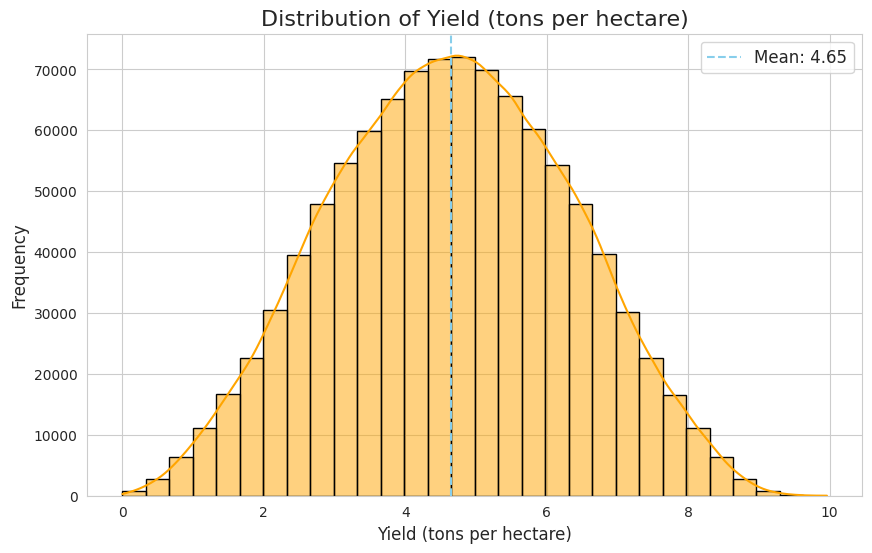

In [9]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.histplot(df['Yield_tons_per_hectare'], bins=30, kde=True, color="orange", edgecolor="black")
plt.axvline(df['Yield_tons_per_hectare'].mean(), color='skyblue', linestyle='--', linewidth=1.5, label=f"Mean: {df['Yield_tons_per_hectare'].mean():.2f}")

plt.title("Distribution of Yield (tons per hectare)", fontsize=16)
plt.xlabel("Yield (tons per hectare)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=12);

- **Identify the regions with the highest and lowest crop yields (`Yield_tons_per_hectare`).**

In [10]:
df.pivot_table(index='Region', 
                  values=['Yield_tons_per_hectare'],
                  aggfunc=['mean', 'median', 'min', 'max', 'count'])

,mean,median,min,max,count
,Yield_tons_per_hectare,Yield_tons_per_hectare,Yield_tons_per_hectare,Yield_tons_per_hectare,Yield_tons_per_hectare
Region,,,,,
East,4.646696,4.650415,0.000411,9.802534,249642
North,4.655298,4.659948,0.005619,9.949207,250112
South,4.649869,4.647228,0.000672,9.963372,250001
West,4.650497,4.651797,0.002143,9.952983,250014


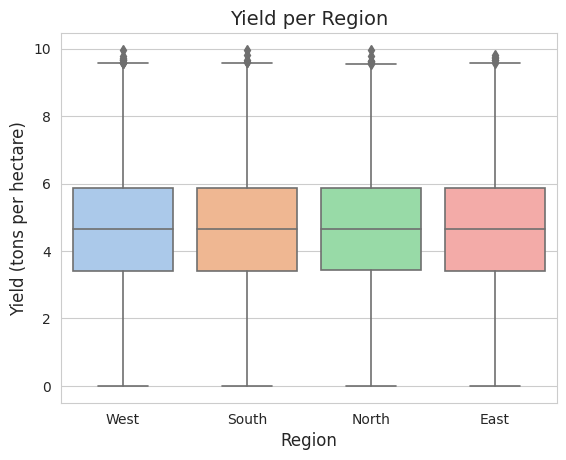

In [11]:
sns.boxplot(x=df['Region'], y=df['Yield_tons_per_hectare'], 
        palette='pastel',
        linewidth=1.2)

plt.title('Yield per Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Yield (tons per hectare)', fontsize=12);

---

1. **Uniform Yield Across Regions**:  
   The average yield (⚪`Yield_tons_per_hectare`⚪) is nearly identical across all regions, ranging from 4.65 to 4.66. This suggests consistent agricultural practices or similar environmental conditions across regions.  

2. **Presence of Extremely Low Yields**:  
   All regions show minimum values close to zero, which may indicate data errors, localized crop failures, or poor conditions in specific areas. This warrants further investigation.  

3. **Comparable Maximum Potential**:  
   Each region achieves similar maximum yields (~9.9 tons per hectare), reflecting a shared ceiling of agricultural productivity, possibly due to uniform access to technology or resources.  

---

- **Analyze the relationship between crop yield and soil types (`Soil_Type`) as well as weather conditions (`Weather_Condition`).**

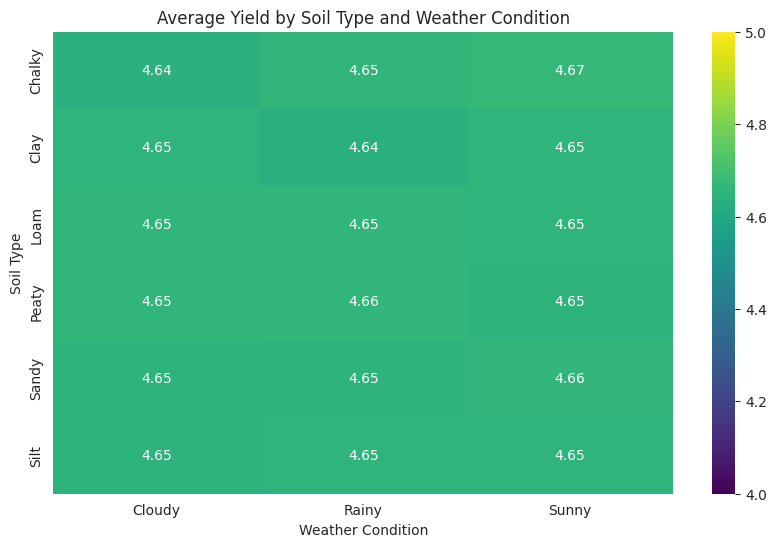

In [12]:
pivot_soil_table = df.pivot_table(
    values='Yield_tons_per_hectare', 
    index='Soil_Type', 
    columns='Weather_Condition', 
    aggfunc='mean'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_soil_table, annot=True, fmt=".2f", cmap="viridis", 
    vmin=4, 
    vmax=5)

plt.title("Average Yield by Soil Type and Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Soil Type");

---

#### Key Findings:

1. **Minimal Impact of Soil Type and Weather Conditions**: The average yield values (⚪ `Yield_tons_per_hectare`) for different soil types (⚪ `Soil_Type`) and weather conditions (⚪ `Weather_Condition`) vary only slightly, ranging between **4.63 and 4.67**. This indicates that neither factor significantly influences yield.

2. **Lack of Distinct Patterns**: There are no clear trends linking specific soil types or weather conditions to higher or lower yields. For example, yields under ⚪ `Rainy`, ⚪ `Cloudy`, and ⚪ `Sunny` conditions are nearly identical across all soil types.

---

- **Examine the impact of rainfall (`Rainfall_mm`) and temperature (`Temperature_Celsius`) on crop yield for each type of crop.**

In [13]:
correlation_by_crop = df.groupby('Crop')[['Rainfall_mm', 'Temperature_Celsius', 'Yield_tons_per_hectare']].corr().round(3)
correlation_by_crop

Rainfall_mm  Temperature_Celsius  \
Crop                                                               
Barley  Rainfall_mm                   1.000                0.002   
        Temperature_Celsius           0.002                1.000   
        Yield_tons_per_hectare        0.765                0.089   
Cotton  Rainfall_mm                   1.000               -0.000   
        Temperature_Celsius          -0.000                1.000   
        Yield_tons_per_hectare        0.765                0.086   
Maize   Rainfall_mm                   1.000                0.001   
        Temperature_Celsius           0.001                1.000   
        Yield_tons_per_hectare        0.765                0.085   
Rice    Rainfall_mm                   1.000               -0.000   
        Temperature_Celsius          -0.000                1.000   
        Yield_tons_per_hectare        0.765                0.082   
Soybean Rainfall_mm                   1.000               -0.001   
        Temperature_Celsius          -0.001                1.000   
        Yield_tons_per_hectare        0.763                0.087   
Wheat   Rainfall_mm                   1.000               -0.003   
        Temperature_Celsius          -0.003                1.000   
        Yield_tons_per_hectare        0.764                0.082   

                                Yield_tons_per_hectare  
Crop                                                    
Barley  Rainfall_mm                              0.765  
        Temperature_Celsius                      0.089  
        Yield_tons_per_hectare                   1.000  
Cotton  Rainfall_mm                              0.765  
        Temperature_Celsius                      0.086  
        Yield_tons_per_hectare                   1.000  
Maize   Rainfall_mm                              0.765  
        Temperature_Celsius                      0.085  
        Yield_tons_per_hectare                   1.000  
Rice    Rainfall_mm                              0.765  
        Temperature_Celsius                      0.082  
        Yield_tons_per_hectare                   1.000  
Soybean Rainfall_mm                              0.763  
        Temperature_Celsius                      0.087  
        Yield_tons_per_hectare                   1.000  
Wheat   Rainfall_mm                              0.764  
        Temperature_Celsius                      0.082  
        Yield_tons_per_hectare                   1.000

---

1. **Rainfall has a strong positive correlation with crop yield** (approximately 0.765 for all crops), indicating its significant impact on productivity.  
2. **Temperature shows minimal correlation with crop yield** (around 0.08-0.09), suggesting a negligible influence across all crops.  
3. **Correlation patterns are consistent across all crop types**, highlighting similar weather-related dependencies regardless of the crop.

---

- **Evaluate the impact of agricultural inputs (`Fertilizer_Used` and `Irrigation_Used`) on crop yield (`Yield_tons_per_hectare`), both individually and combined.**

In [14]:
by_Fertilizer = df.groupby('Fertilizer_Used')['Yield_tons_per_hectare'].agg(['mean', 'median', 'min', 'max'])
by_Fertilizer

,mean,median,min,max
Fertilizer_Used,,,,
False,3.901402,3.904919,0.000411,8.683593
True,5.399616,5.398603,0.498752,9.963372


---

1. **Impact of Fertilizer Use (`Fertilizer_Used`)**:
   - Average yield is significantly higher with fertilizers (5.40) compared to without (3.90).
   - Both the median and maximum yields are greater when fertilizers are used.
   - Fertilizers have a strong positive impact on yield.

---

In [15]:
by_Irrigation = df.groupby('Irrigation_Used')['Yield_tons_per_hectare'].agg(['mean', 'median', 'min', 'max'])
by_Irrigation

,mean,median,min,max
Irrigation_Used,,,,
False,4.051897,4.052659,0.000411,8.986859
True,5.250231,5.250169,0.371804,9.963372


---

2. **Impact of Irrigation Use (`Irrigation_Used`)**:
   - Average yield increases with irrigation (5.25 vs. 4.05 without).
   - Minimum and maximum yields are also higher when irrigation is applied.
   - Irrigation positively influences yield, though the effect is slightly less pronounced than fertilizers.

---

In [16]:
by_both = df.groupby(['Fertilizer_Used', 'Irrigation_Used'])['Yield_tons_per_hectare'].agg(['mean', 'median', 'min', 'max'])
by_both

mean    median       min       max
Fertilizer_Used Irrigation_Used                                        
False           False            3.305905  3.302894  0.000411  7.337233
                True             4.499366  4.498009  0.371804  8.683593
True            False            4.799632  4.802903  0.498752  8.986859
                True             5.999009  5.999967  1.871298  9.963372

---

3. **Combined Analysis (`Fertilizer_Used` and `Irrigation_Used`)**:
   - The lowest yield occurs without both fertilizers and irrigation (average 3.31).
   - Either fertilizers (4.80) or irrigation (4.50) alone improves yield significantly.
   - The highest yield is achieved when both fertilizers and irrigation are used together (average 6.00, maximum 9.96).
  
---

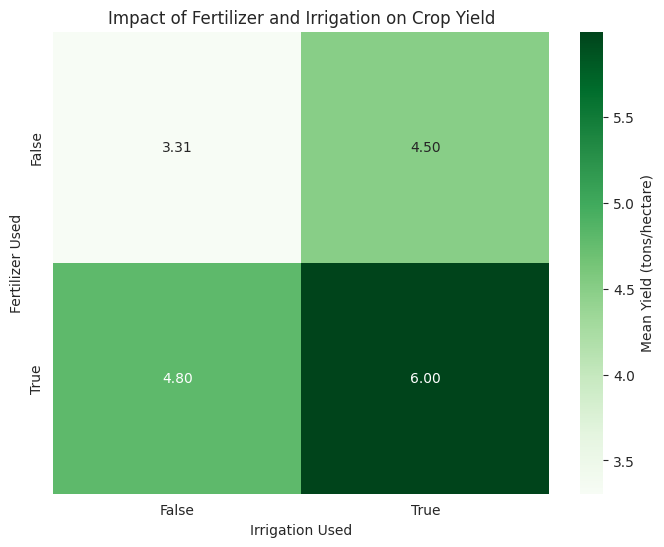

In [17]:
data_for_viz = {
    'Fertilizer_Used': [False, False, True, True],
    'Irrigation_Used': [False, True, False, True],
    'Mean_Yield': [3.305905, 4.499366, 4.799632, 5.999009]
}
data = pd.DataFrame(data_for_viz)

heatmap_data = data.pivot(index='Fertilizer_Used', columns='Irrigation_Used', values='Mean_Yield')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='Greens', cbar_kws={'label': 'Mean Yield (tons/hectare)'})
plt.title('Impact of Fertilizer and Irrigation on Crop Yield')
plt.xlabel('Irrigation Used')
plt.ylabel('Fertilizer Used');

---

   **Conclusion**: Fertilizers and irrigation complement each other, with the combined use yielding the best results.

---

<h1 style="background-color:#a9ebba;
           font-family:Garamond;
           font-size:250%;
           color:#024d4a;
           text-align:center;
           border-radius:100px 10px;">
   <b>Regional Analysis: Exploring Variations in Rainfall, Temperature, Yield, and Harvest Time with ANOVA Testing</b>
</h1>

In [18]:
df.pivot_table(index = 'Region', values = ['Days_to_Harvest', 'Temperature_Celsius', 'Rainfall_mm', 'Yield_tons_per_hectare'],
               aggfunc = 'mean')

,Days_to_Harvest,Rainfall_mm,Temperature_Celsius,Yield_tons_per_hectare
Region,,,,
East,104.536140,549.339252,27.504097,4.646696
North,104.502535,550.894528,27.497395,4.655298
South,104.494982,550.101532,27.503645,4.649869
West,104.446967,549.974560,27.519181,4.650497


---

1. **Days to Harvest:** Nearly identical across regions (~104.5 days), indicating no significant regional impact.
2. **Rainfall:** Minimal variation (~549–551 mm), suggesting similar climatic conditions.
3. **Temperature:** Stable across regions (~27.5°C) with negligible differences.
4. **Yield:** Slightly higher in **North (4.655 tons/ha)**, but overall consistent across regions.

**Conclusion:** Regions share similar environmental conditions and yield levels, indicating uniform agricultural performance. 

---

- **To investigate whether there are significant differences in **yield (tons per hectare)** and **days to harvest** across regions, ANOVA tests were conducted:**

In [19]:
east_yield = df[df['Region'] == 'East']['Yield_tons_per_hectare']
north_yield = df[df['Region'] == 'North']['Yield_tons_per_hectare']
south_yield = df[df['Region'] == 'South']['Yield_tons_per_hectare']
west_yield = df[df['Region'] == 'West']['Yield_tons_per_hectare']

stat, pvalue = f_oneway(east_yield, north_yield, south_yield, west_yield)
print(f"F-statistic: {stat}, p-value: {pvalue}")

F-statistic: 1.097506976425887, p-value: 0.3486854760980868


In [20]:
east_days = df[df['Region'] == 'East']['Days_to_Harvest']
north_days = df[df['Region'] == 'North']['Days_to_Harvest']
south_days = df[df['Region'] == 'South']['Days_to_Harvest']
west_days = df[df['Region'] == 'West']['Days_to_Harvest']

stat, p = f_oneway(east_days, north_days, south_days, west_days)
print(f"F-statistic: {stat}, p-value: {p}")

F-statistic: 0.5015612248334257, p-value: 0.6811898509990233


---

1. **Yield (tons per hectare):**  
   - The F-statistic (1.10) and p-value (0.349) indicate no statistically significant differences in average yield among regions.  
   - Any variations in yield are likely due to random chance rather than regional factors.

2. **Days to Harvest:**  
   - The F-statistic (0.50) and p-value (0.681) suggest no statistically significant differences in the average time to harvest between regions.  
   - The harvest duration is consistent across regions.

**Conclusion:**  
These tests confirm that regions do not significantly differ in terms of yield or time to harvest. Agricultural strategies and planning can be applied uniformly across regions, focusing on other factors to enhance productivity.

---

- **Determine the correlation between 'Days_to_Harvest' and 'Yield'**

In [21]:
correlation = df['Days_to_Harvest'].corr(df['Yield_tons_per_hectare'])
print(f"Correlation between Days_to_Harvest and Yield: {correlation:.4f}")

Correlation between Days_to_Harvest and Yield: -0.0026


---

The correlation between **Days to Harvest** and **Yield** is nearly zero (-0.0026), indicating no linear relationship between these variables.

---

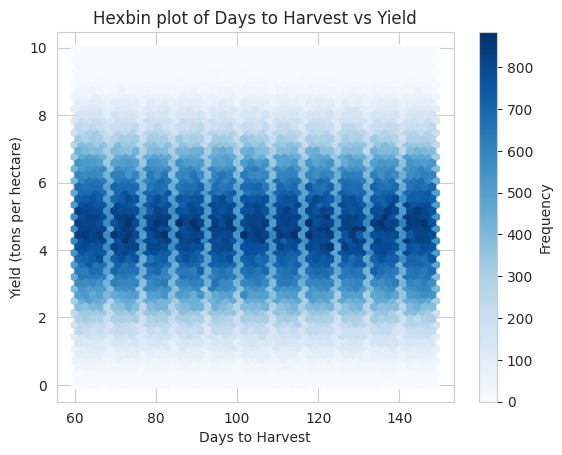

In [22]:
plt.hexbin(df['Days_to_Harvest'], df['Yield_tons_per_hectare'], gridsize=50, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Hexbin plot of Days to Harvest vs Yield')
plt.xlabel('Days to Harvest')
plt.ylabel('Yield (tons per hectare)')
plt.savefig('asd.jpeg')

---

1. The **hexbin plot** shows no clear pattern between **Days to Harvest** and **Yield**, supporting the near-zero correlation (-0.0026).  
2. The points are evenly distributed, indicating no significant relationship or trend between the variables.  
3. Most of the data density lies in the middle range of both variables, suggesting common values for Days to Harvest and Yield in the dataset.

---

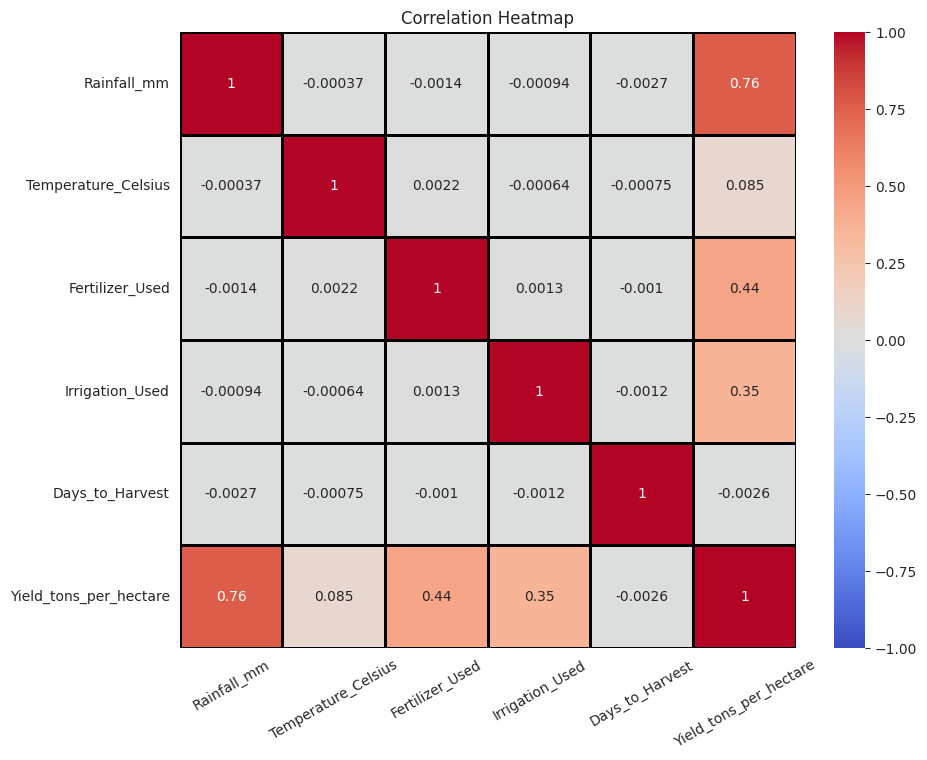

In [23]:
df_corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=2, linecolor='black', square=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=30);

---

1. **Strong correlation between `Rainfall_mm` and `Yield_tons_per_hectare` (0.764):** Higher rainfall is strongly associated with increased yield.

2. **Moderate correlation with yield:**  
   - `Fertilizer_Used` (0.442) improves yield.  
   - `Irrigation_Used` (0.353) Irrigation is linked to higher yield, making it particularly important in regions with low rainfall.

3. **Weak or negligible correlations:**  
   - `Days_to_Harvest` (-0.003) and `Temperature_Celsius` (0.085) have minimal direct impact on yield.


--- 

In [24]:
df['Encoded_Fertilizer_Used'] = np.where(df['Fertilizer_Used']==True, 1, 0)
df['Encoded_Irrigation_Used'] = np.where(df['Irrigation_Used']==True, 1, 0)

X = df[['Temperature_Celsius', 'Encoded_Fertilizer_Used', 'Encoded_Irrigation_Used', 'Days_to_Harvest']]
y = df['Yield_tons_per_hectare']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Yield_tons_per_hectare   R-squared:                       0.327
Model:                                OLS   Adj. R-squared:                  0.327
Method:                     Least Squares   F-statistic:                 1.214e+05
Date:                    Tue, 07 Jan 2025   Prob (F-statistic):               0.00
Time:                            17:15:24   Log-Likelihood:            -1.7483e+06
No. Observations:                  999769   AIC:                         3.497e+06
Df Residuals:                      999764   BIC:                         3.497e+06
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

---

### **Model Purpose:**
The model was built using **OLS (Ordinary Least Squares)** to predict crop yield based on factors such as temperature, days to harvest, fertilizer and irrigation use. The goal is to understand which factors most influence yield and to assess prediction accuracy.

### **Key Findings:**

1. **R-squared**: 0.327 — the model explains 32.7% of the yield variation, indicating that other factors not included may be influencing the results.
   - **F-statistic**: 1.21e+05, p-value = 0.00 — the model is statistically significant.

2. **Key Factors:**
   - **Temperature**: Each 1°C increase in temperature raises yield by 0.02 tons per hectare.
   - **Days to Harvest**: An increase in days to harvest slightly decreases yield.
   - **Fertilizer Use**: Significant positive impact on yield.
   - **Irrigation Use**: Positive effect on yield. significant.

3. **Prediction**: The model can be used to make preliminary yield predictions based on the available factors.

**Note:** The **Rainfall_mm** column was excluded from the model due to its high correlation with the target variable, **Yield_tons_per_hectare**, which could lead to multicollinearity and affect the stability of the regression results. Additionally, certain other columns, such as **Soil_Type** and **Weather_Condition**, were not included in the final model due to their lack of significant impact on the yield prediction based on the statistical tests. These variables were tested and removed to streamline the model and focus on the most influential factors, ensuring a more effective and interpretable prediction.

---

- **To further confirm the strong relationship between 🌧️ Rainfall (mm) and 🌾 Crop Yield (tons/hectare), a scatter plot was created using a random sample of 10,000 data points. The plot clearly illustrates a strong positive correlation between these two variables, which is supported by a calculated correlation coefficient of **0.76**.**

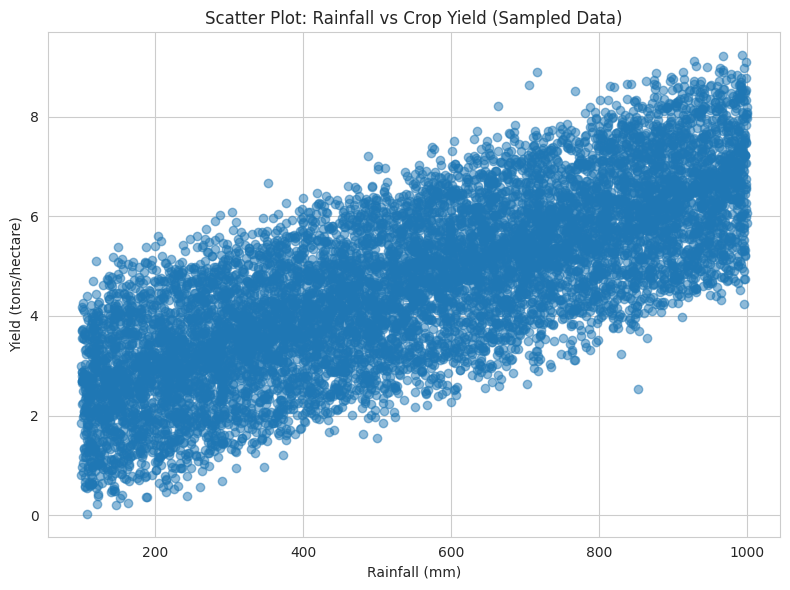

In [25]:
sample_df = df.sample(n=10000, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(sample_df['Rainfall_mm'], sample_df['Yield_tons_per_hectare'], alpha=0.5)
plt.title("Scatter Plot: Rainfall vs Crop Yield (Sampled Data)")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Yield (tons/hectare)")
plt.tight_layout();

<h1 style="background-color:#a9ebba;
           font-family:Garamond;
           font-size:300%;
           color:#024d4a;
           text-align:center;
           border-radius:100px 10px;">
   <b>Final Conclusion:</b>
</h1>

---

The analysis of agricultural productivity reveals key insights into factors influencing crop yield. Across regions, yield values are remarkably consistent, indicating uniform agricultural practices or environmental conditions. The presence of extremely low yields in certain cases suggests potential data issues or localized failures, warranting further investigation. Notably, rainfall demonstrates a strong positive correlation with yield, while temperature has minimal impact.

The combined use of fertilizers and irrigation stands out as the most effective strategy, significantly improving yields. Statistical tests and correlation analysis confirm that soil type, weather conditions, and days to harvest have little influence on yield variations across regions. The results suggest that regions can apply similar agricultural strategies with a focus on optimizing water and nutrient management.

A regression model (OLS) predicts yield based on key factors such as fertilizer and irrigation use, with moderate explanatory power (R-squared: 0.327). The model underscores the importance of fertilizer and irrigation in boosting productivity. Rainfall, although strongly correlated with yield, was excluded from the model due to multicollinearity concerns.

In summary, optimizing rainfall management, fertilizer use, and irrigation are the primary levers for enhancing crop yield across regions.

---

<div style="font-family: Arial, sans-serif; line-height: 1.6; color: #2e7d32; background-color: #e8f5e9; padding: 20px; border-radius: 8px; border: 1px solid #c8e6c9;">

# 📝 Appreciation  

Thank you for taking the time to explore this notebook! 🥹   

Feel free to share your thoughts!  

Happy coding and good luck with your projects! 🌟  

</div>